# Multiple plots

## Review from last lecture...

In [1]:
library('tidyverse')

# This will make your plots look better in Jupyter
options(repr.plot.width = 4, repr.plot.height = 3, repr.plot.res = 300) 

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



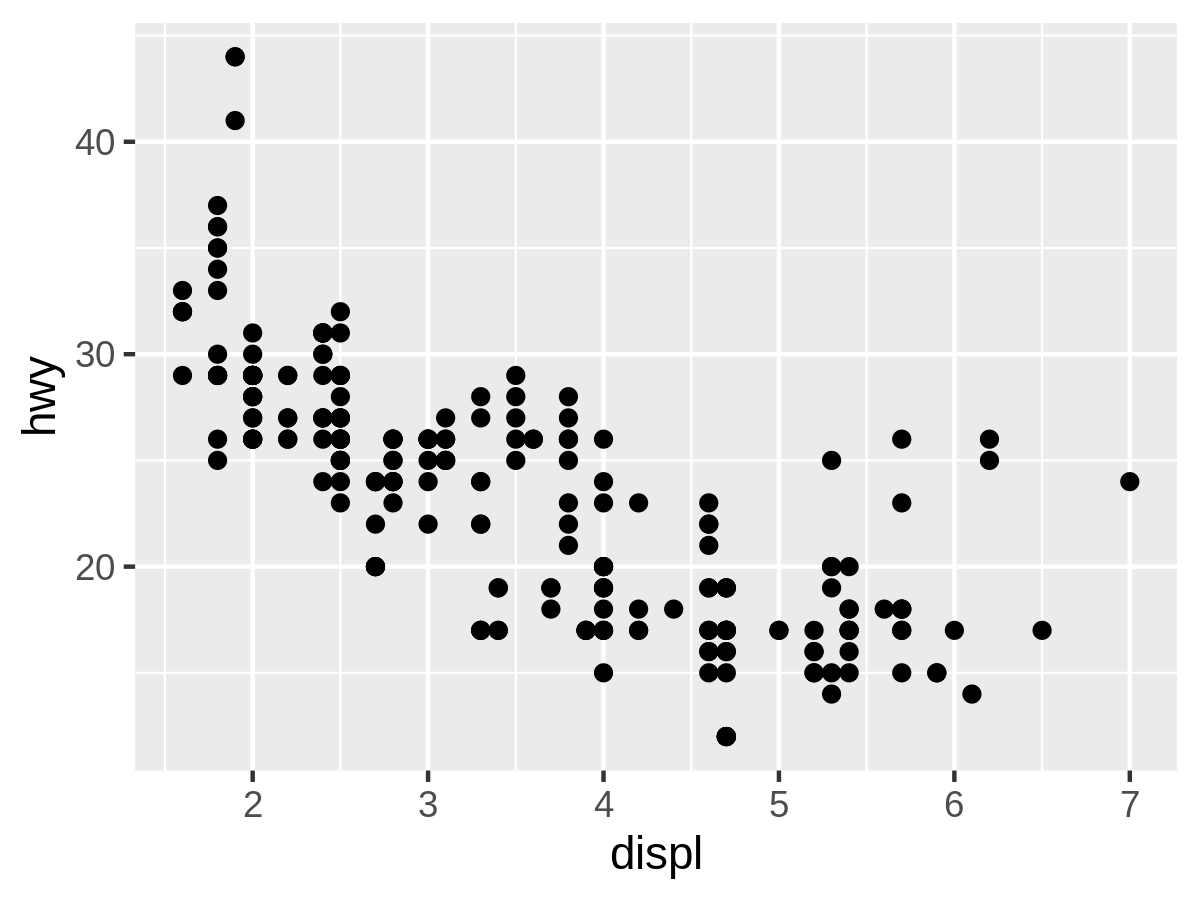

In [2]:
p = ggplot(mpg, aes(x = displ, y = hwy)) 

p = p + geom_point()

p 

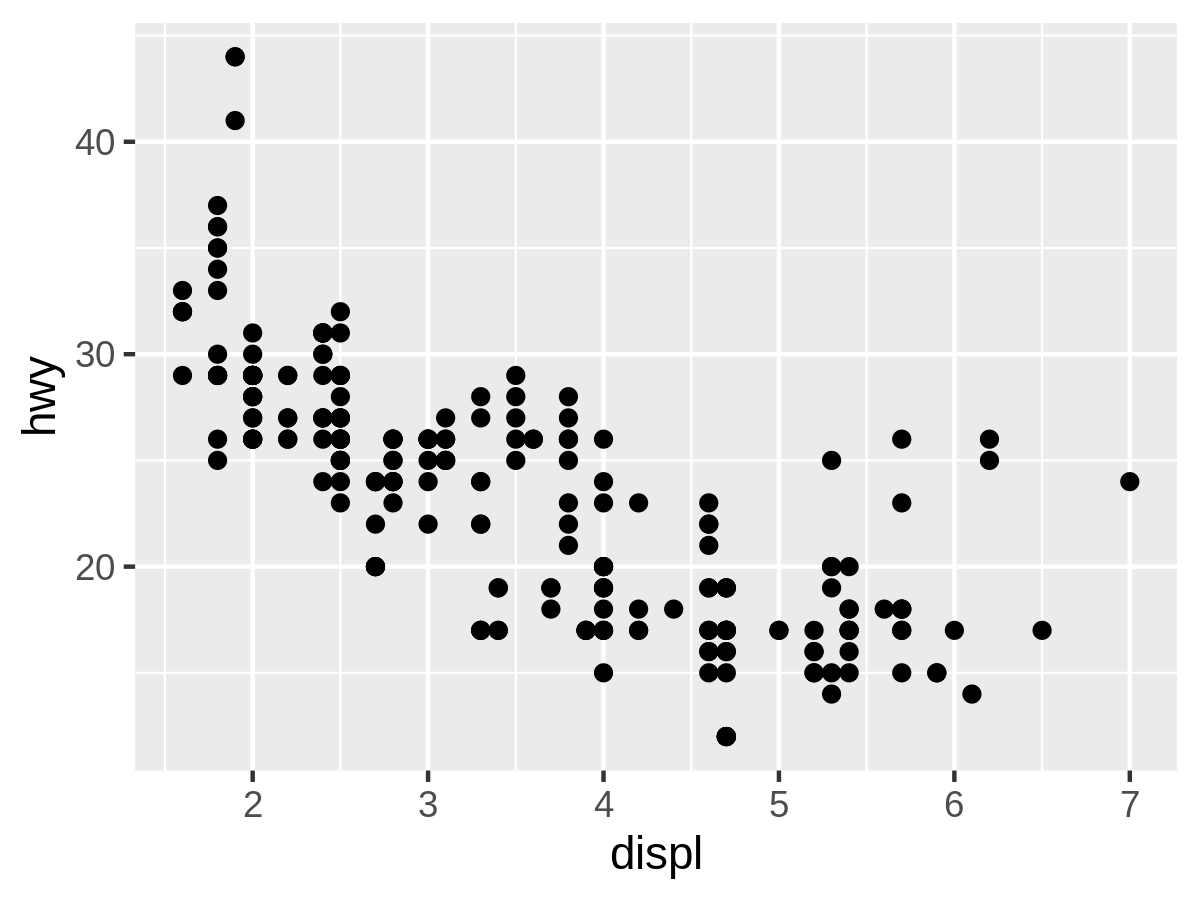

In [3]:
# alternatively add data and mapping in the geom

p = ggplot() +
    geom_point(data = mpg, mapping = aes(x = displ, y = hwy))

p

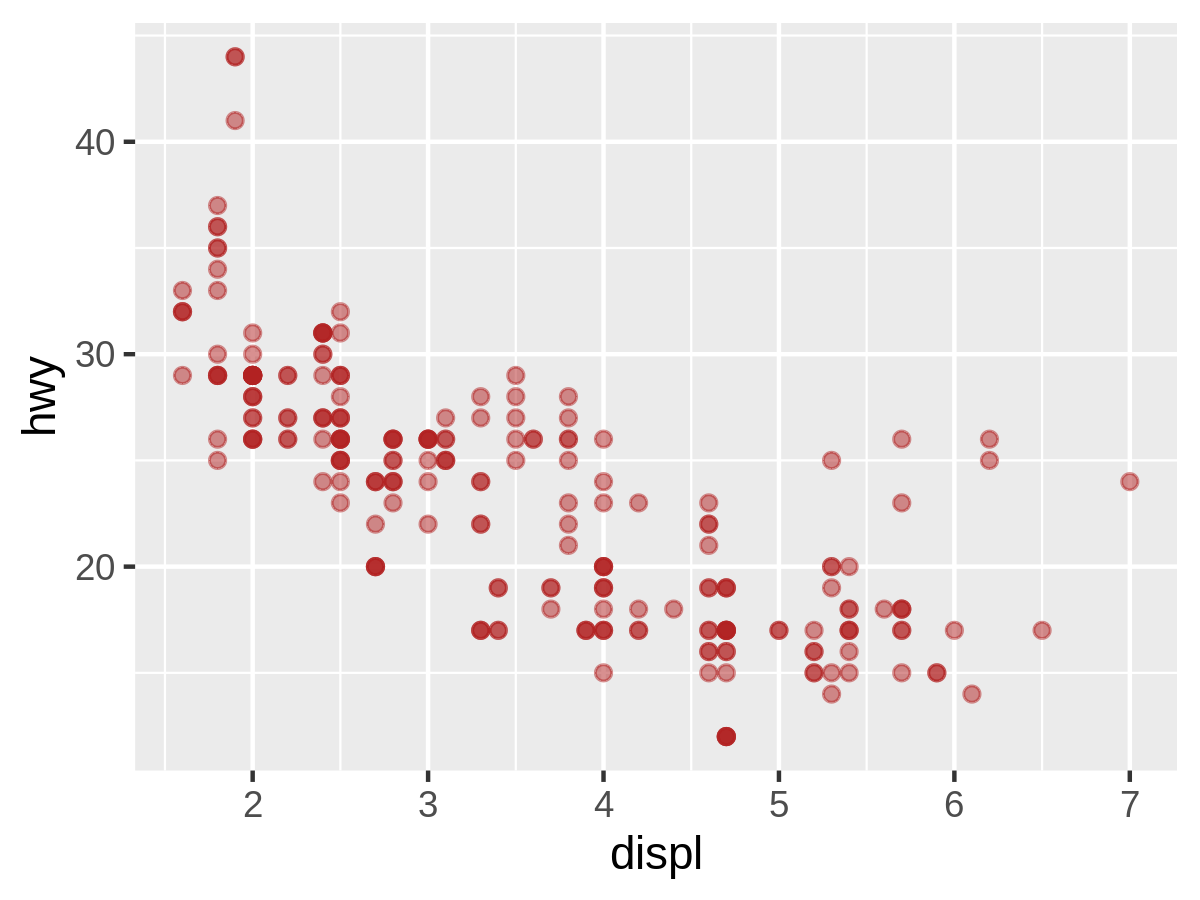

In [4]:
# How to change the color of all the points (i.e. not map them to a column in the data)?

p = ggplot(mpg, aes(x = displ, y = hwy))

p = p + geom_point(color = 'firebrick', alpha = 0.5)

p

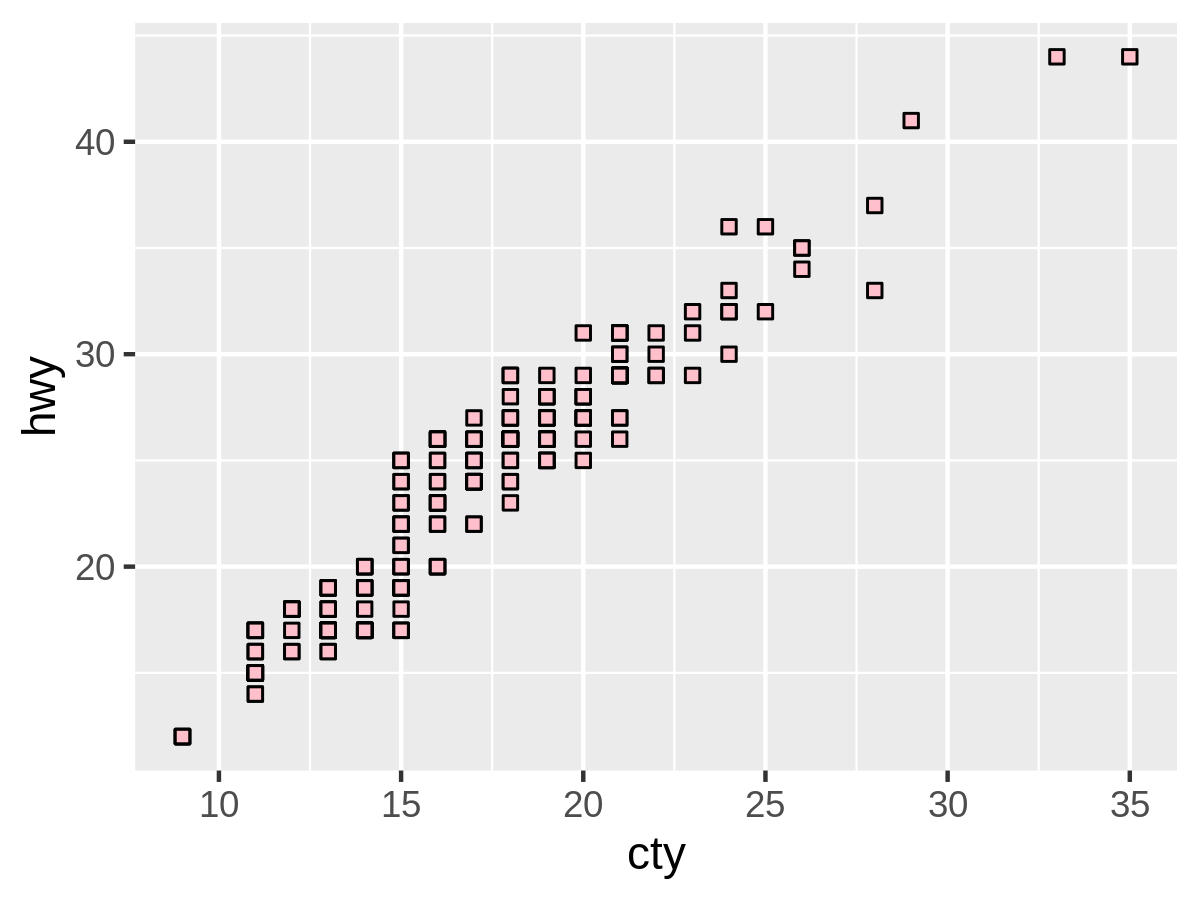

In [5]:
# What other chart properties can be "mapped?"
# X, Y, color...
# Hint: # https://r4ds.had.co.nz/data-visualisation.html#fig:shapes

p = ggplot(mpg, aes(x = cty, y = hwy))

p = p + geom_point(shape = 22, fill = 'pink', color = 'black')

p

# Facets

## facet_wrap

In [6]:
# Let's use a different data set

iris %>% head

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


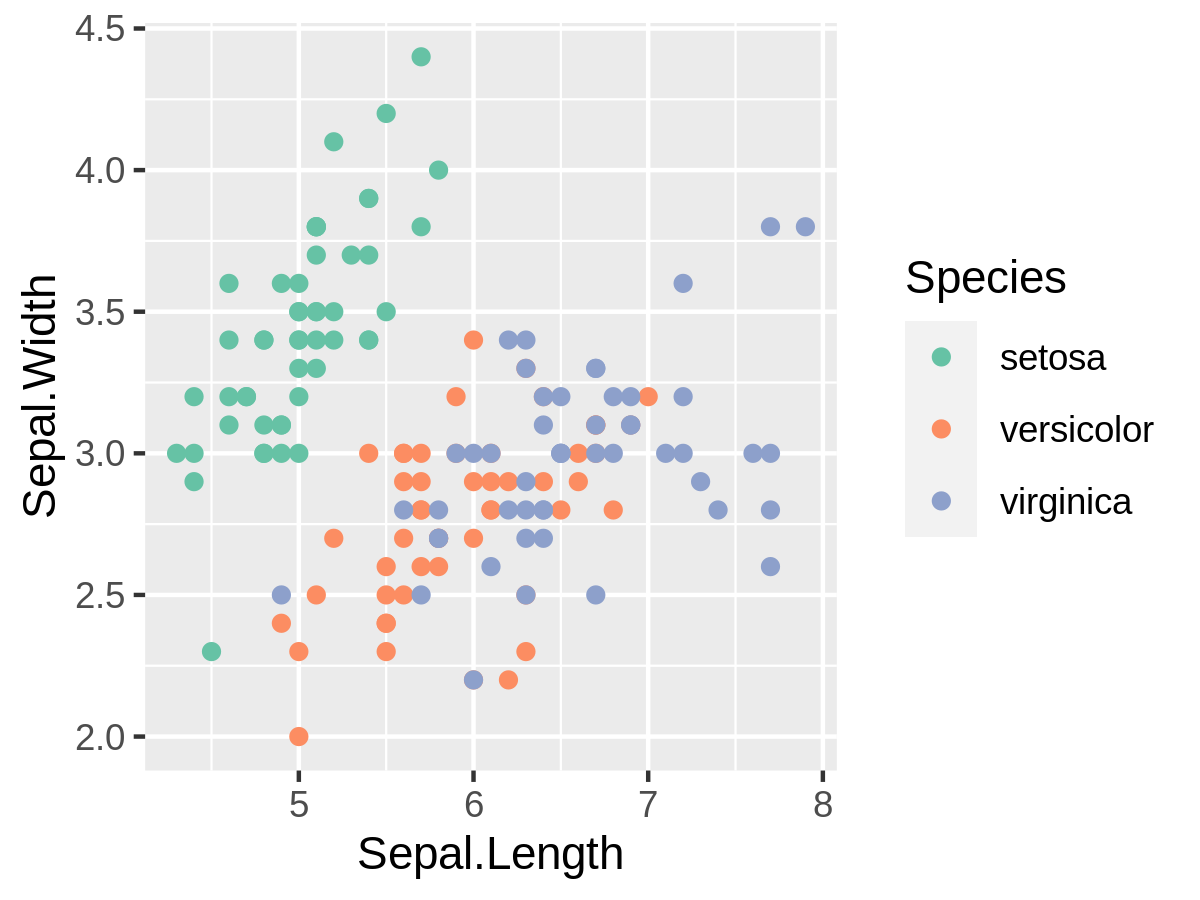

In [7]:
p = ggplot(iris, aes(x = Sepal.Length, y = Sepal.Width, color = Species))

p = p + geom_point() 

p = p + scale_color_brewer(type = "qual", palette = "Set2")

p

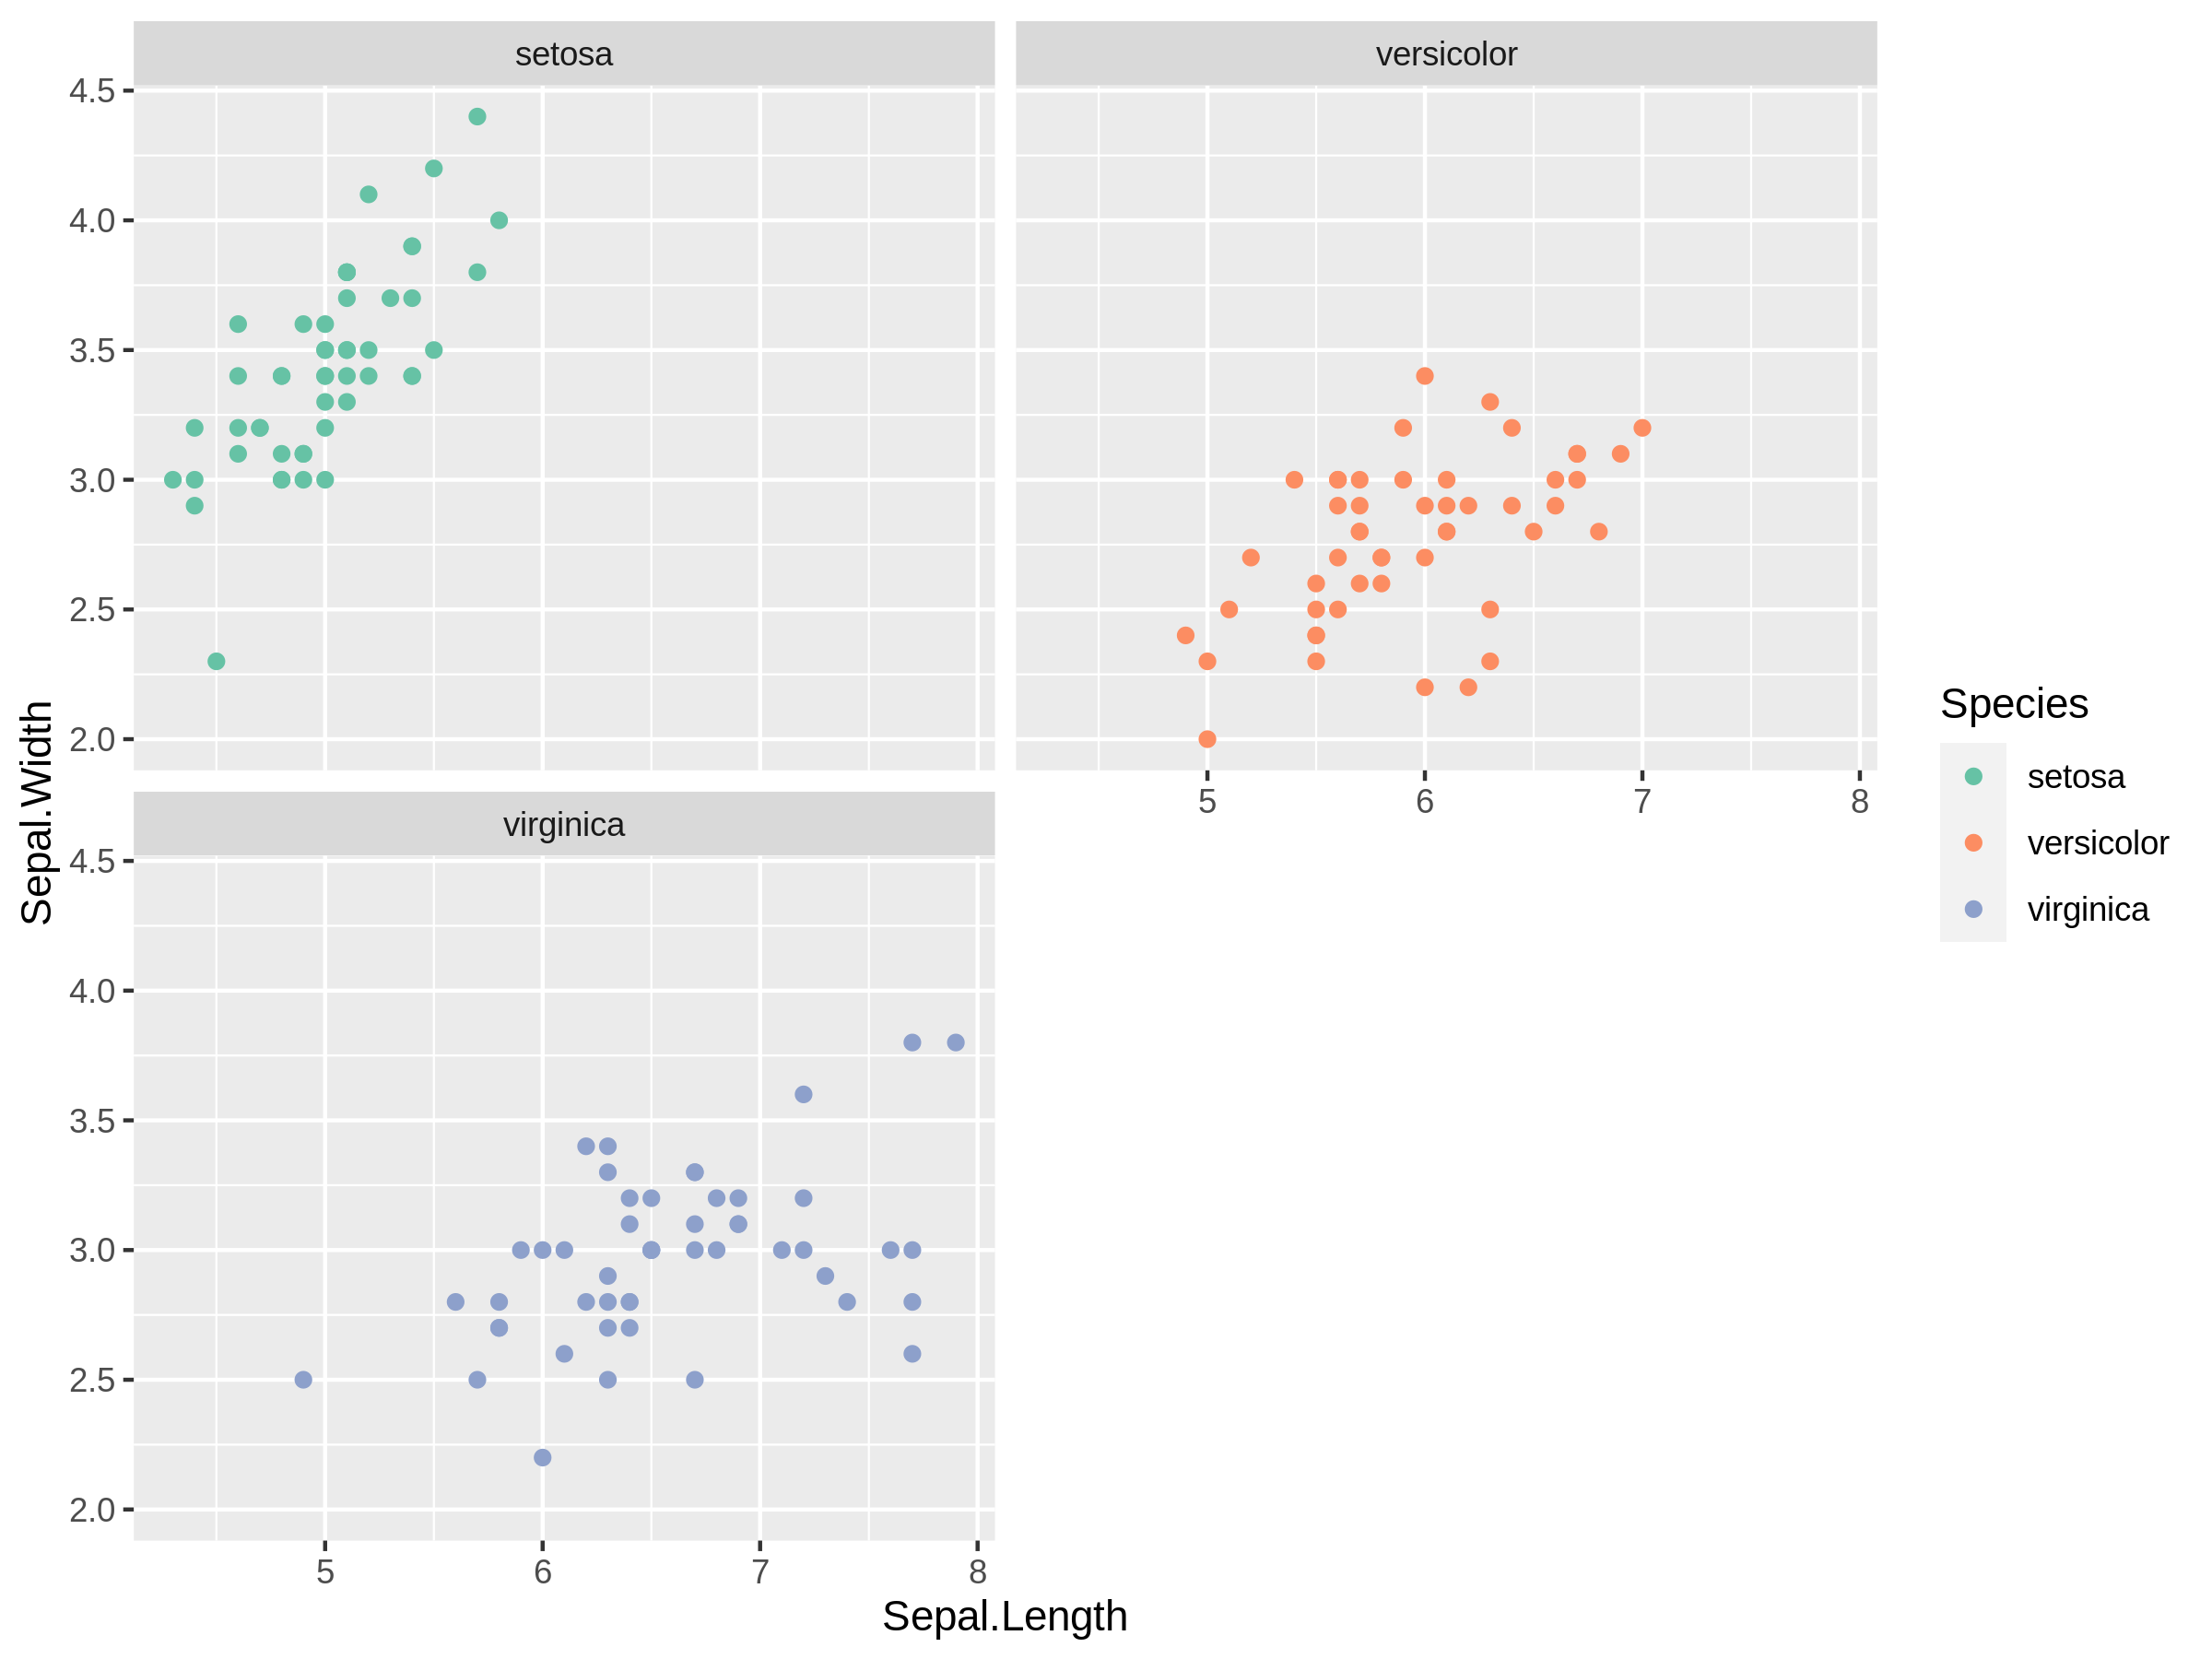

In [8]:
options(repr.plot.width = 8, repr.plot.height = 6)

p = ggplot(iris, aes(x = Sepal.Length, 
                     y = Sepal.Width, 
                     color = Species))

p = p + geom_point() 

p = p + scale_color_brewer(type = "qual", 
                           palette = "Set2")

p = p + facet_wrap(~Species, nrow = 2)

p

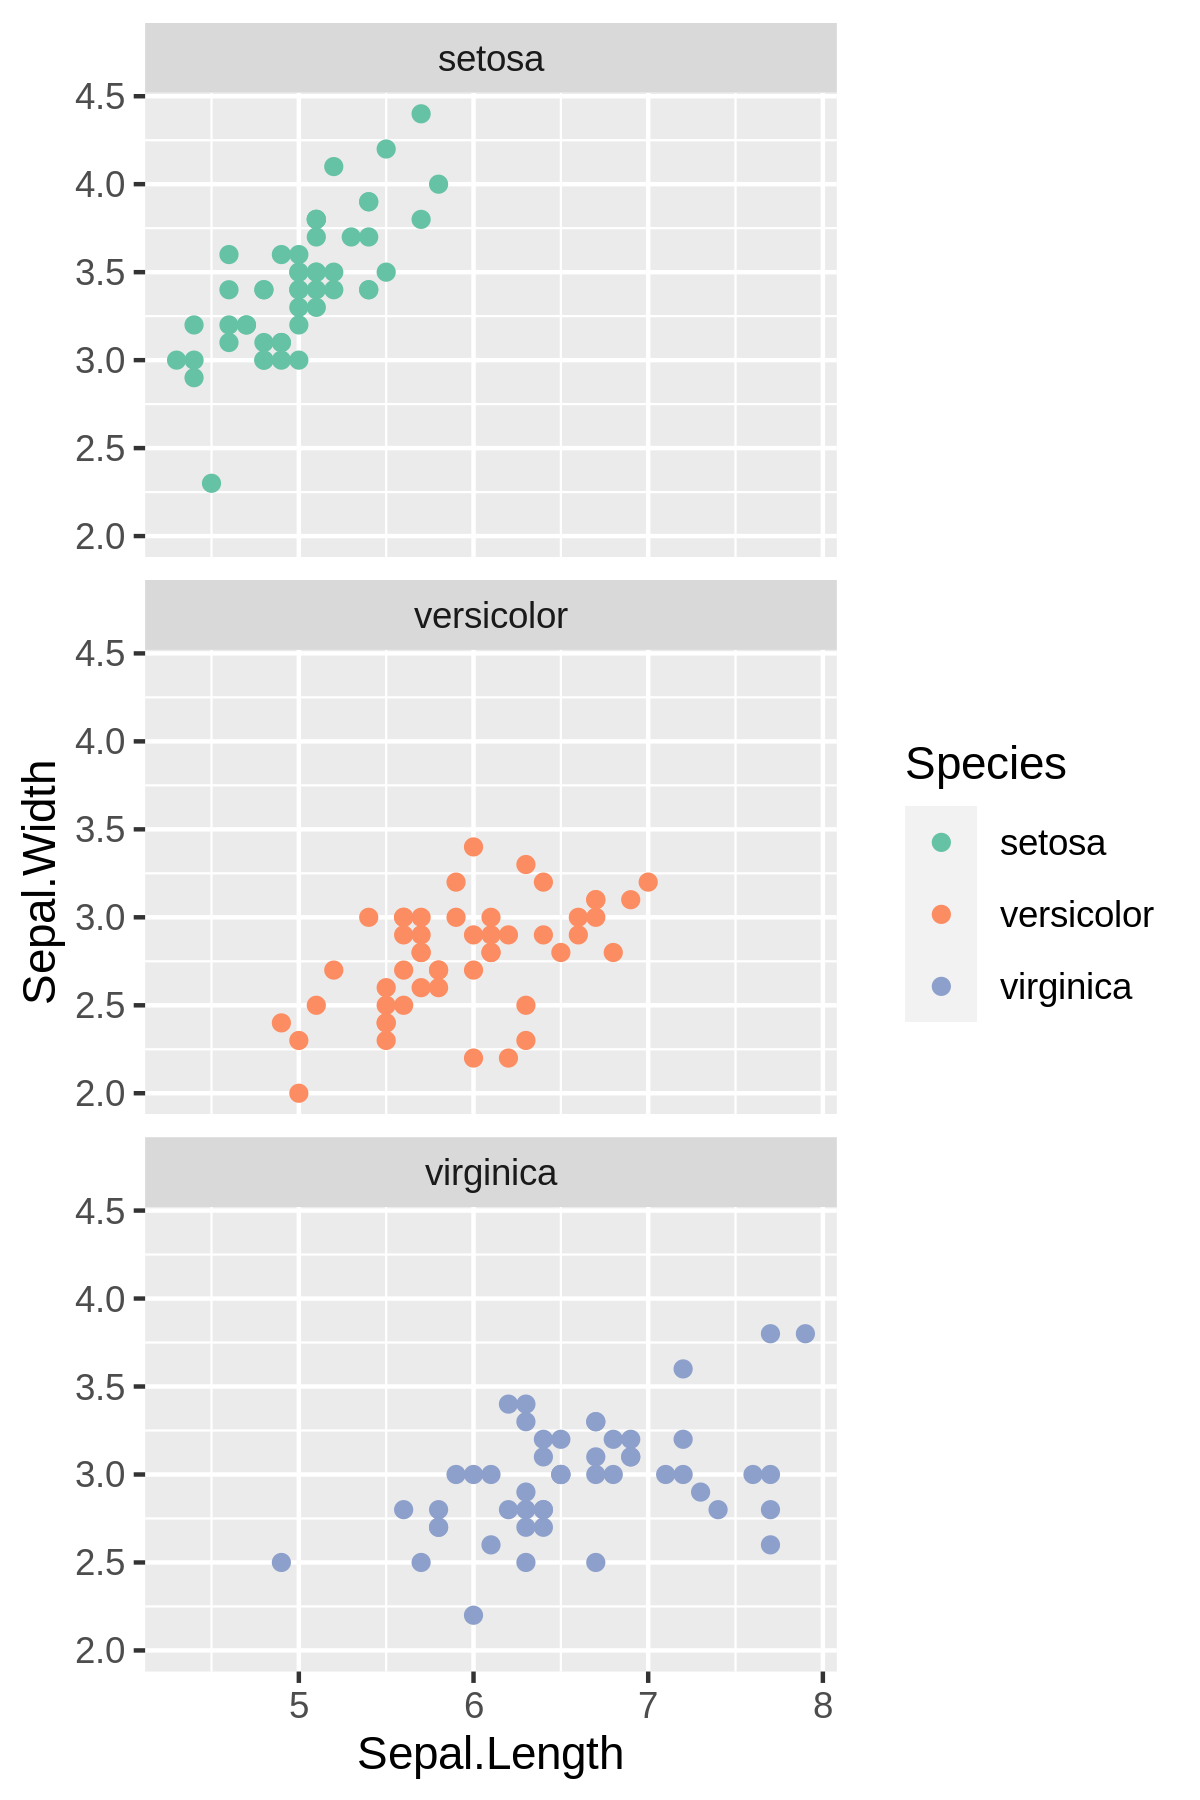

In [9]:
options(repr.plot.width=4, repr.plot.height=6)

p = p + facet_wrap(~Species, ncol = 1)

p

## facet_grid

In [10]:
mpg %>% head

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [11]:
mpg %>% group_by(drv) %>% tally() %>% arrange(desc(n))

drv,n
<chr>,<int>
f,106
4,103
r,25


In [12]:
mpg %>% group_by(cyl) %>% tally() %>% arrange(desc(n))

cyl,n
<int>,<int>
4,81
6,79
8,70
5,4


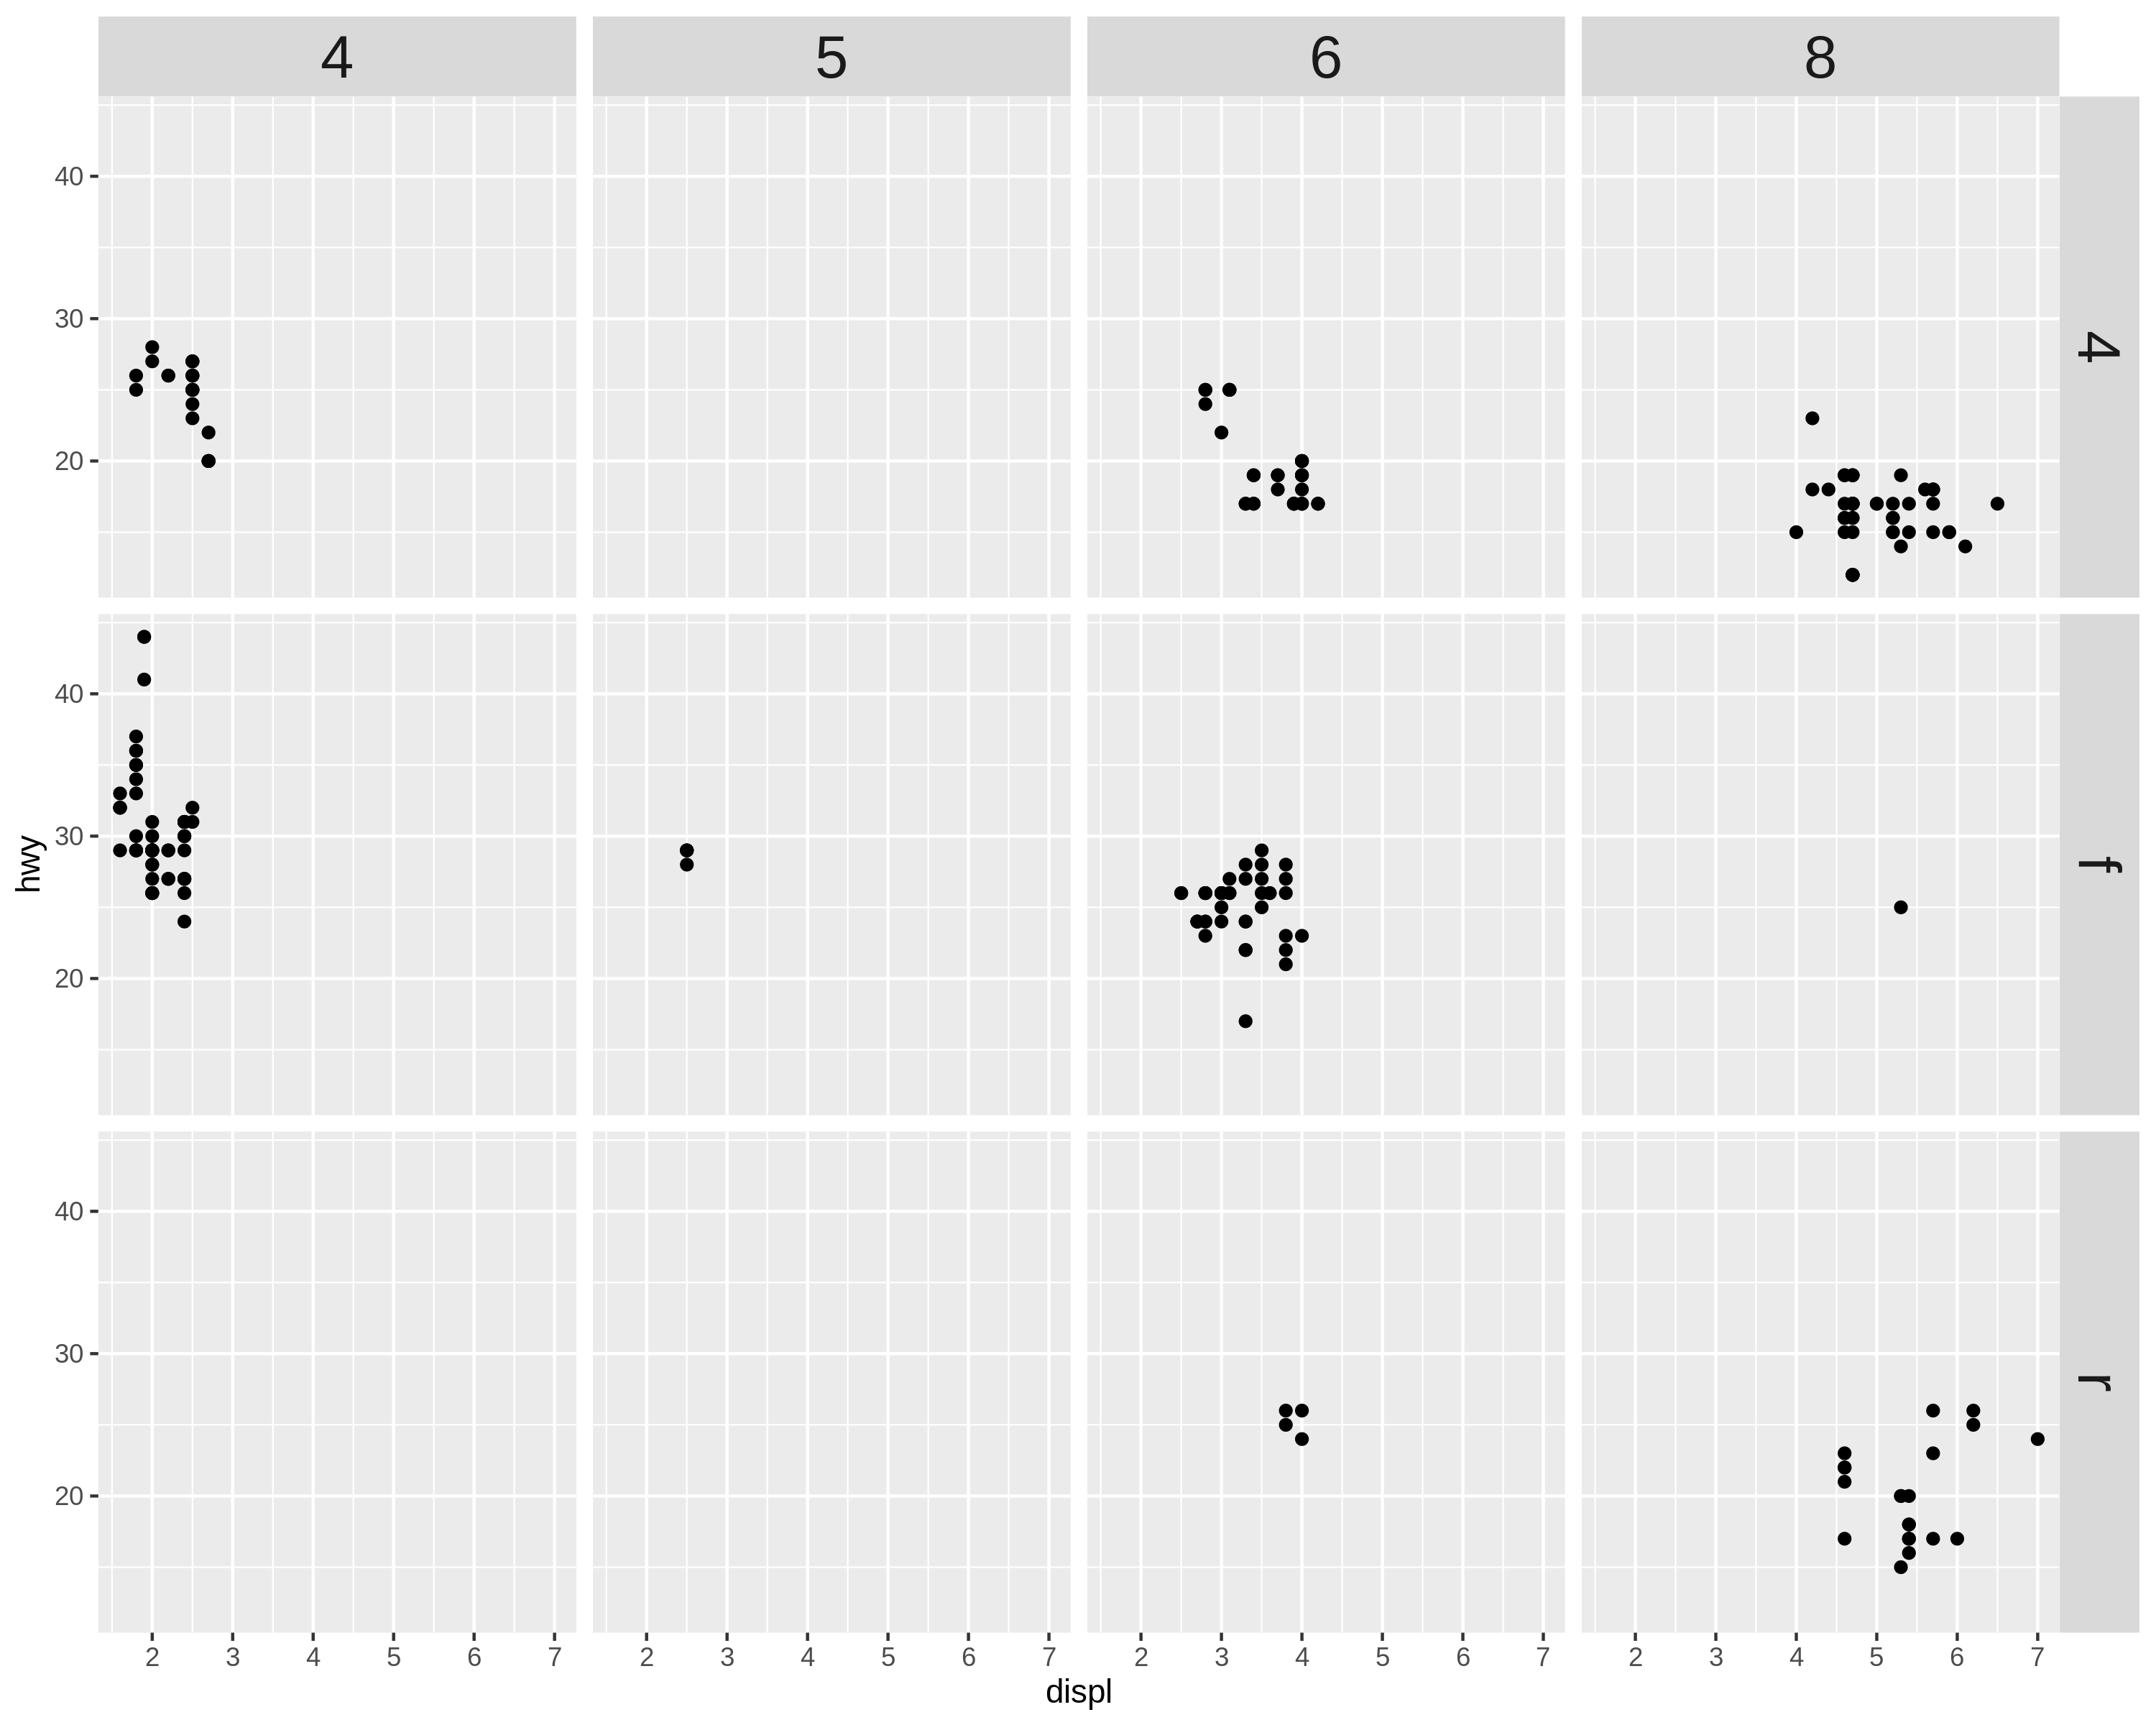

In [12]:
options(repr.plot.width=10, repr.plot.height=8)

p = ggplot(mpg, aes(x = displ, y = hwy))

p = p + geom_point()

p = p + facet_grid(drv ~ cyl)

p = p + theme(strip.text = element_text(size = 20))

p

# Additional packages
E.g. [Patchwork](https://github.com/thomasp85/patchwork)

## Workflow

1. research (i.e. "google")
1. install (we'll learn this later)
1. import (`library`)
1.  use

[patchwork](https://github.com/thomasp85/patchwork)

In [3]:
library('patchwork')
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,outlier
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,no
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,no
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,no
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,no
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,no
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,no


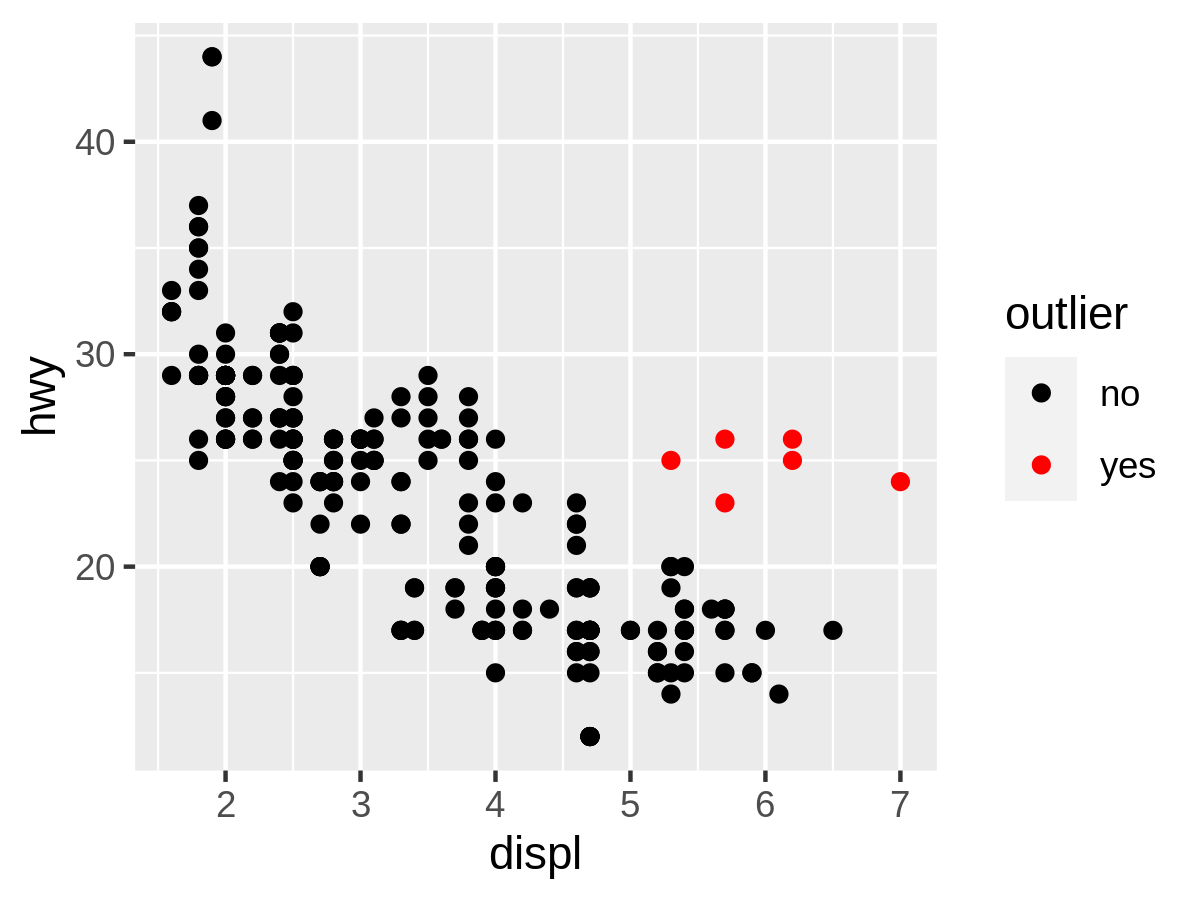

In [6]:
options(repr.plot.width=4, repr.plot.height=3)

mpg.new = mpg %>% mutate(outlier = ifelse(hwy > 20 & displ > 5, 'yes', 'no')) # Creating a new column called outlier.

mpg.new |> head()

p = ggplot(mpg.new, aes(x = displ, y = hwy, color = outlier))
    
p = p + geom_point()

p = p + scale_color_manual(values=c('black', 'red'))

p

In [7]:
mpg.new %>% head

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,outlier
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,no
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,no
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,no
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,no
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,no
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,no


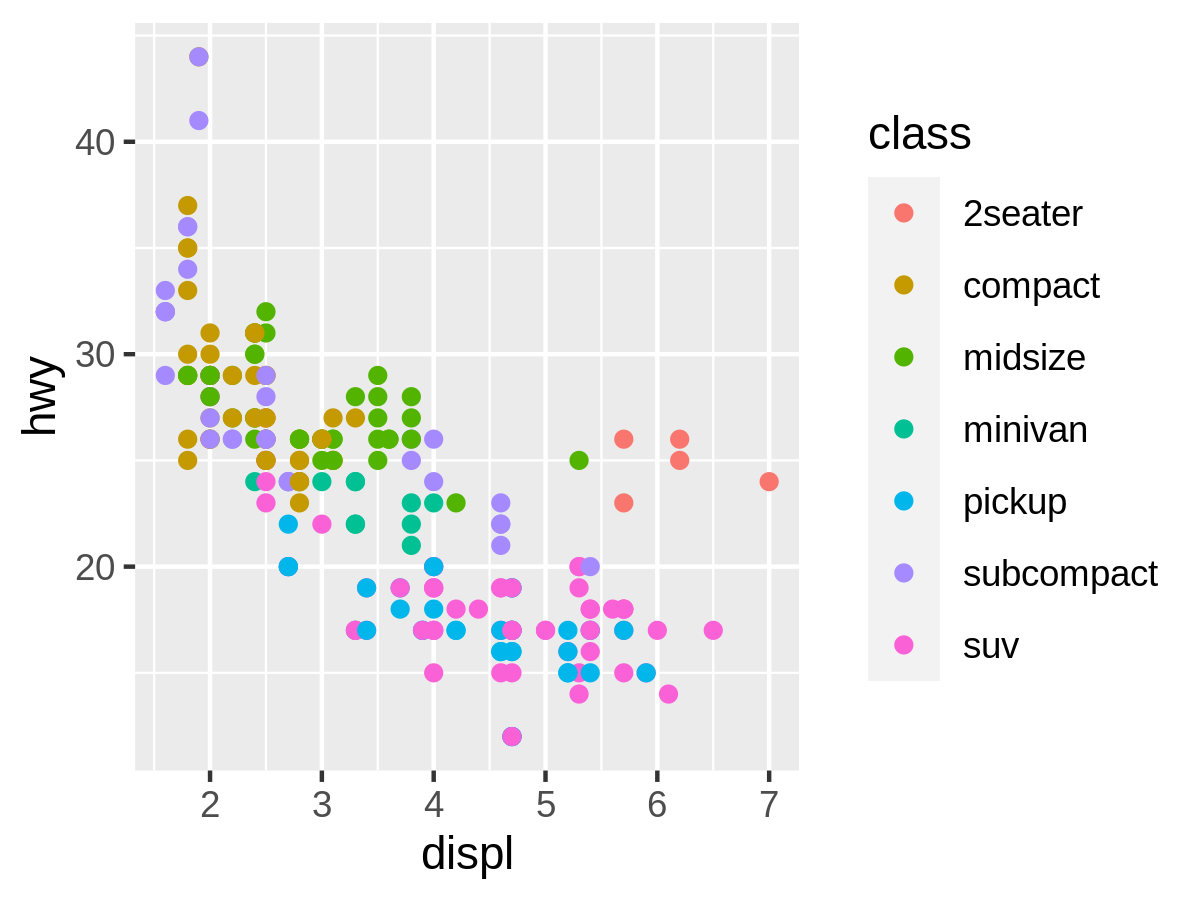

In [8]:
p2 = ggplot(mpg, aes(x = displ, y = hwy, color = class)) # coloring points by class column

p2 = p2 + geom_point()

p2

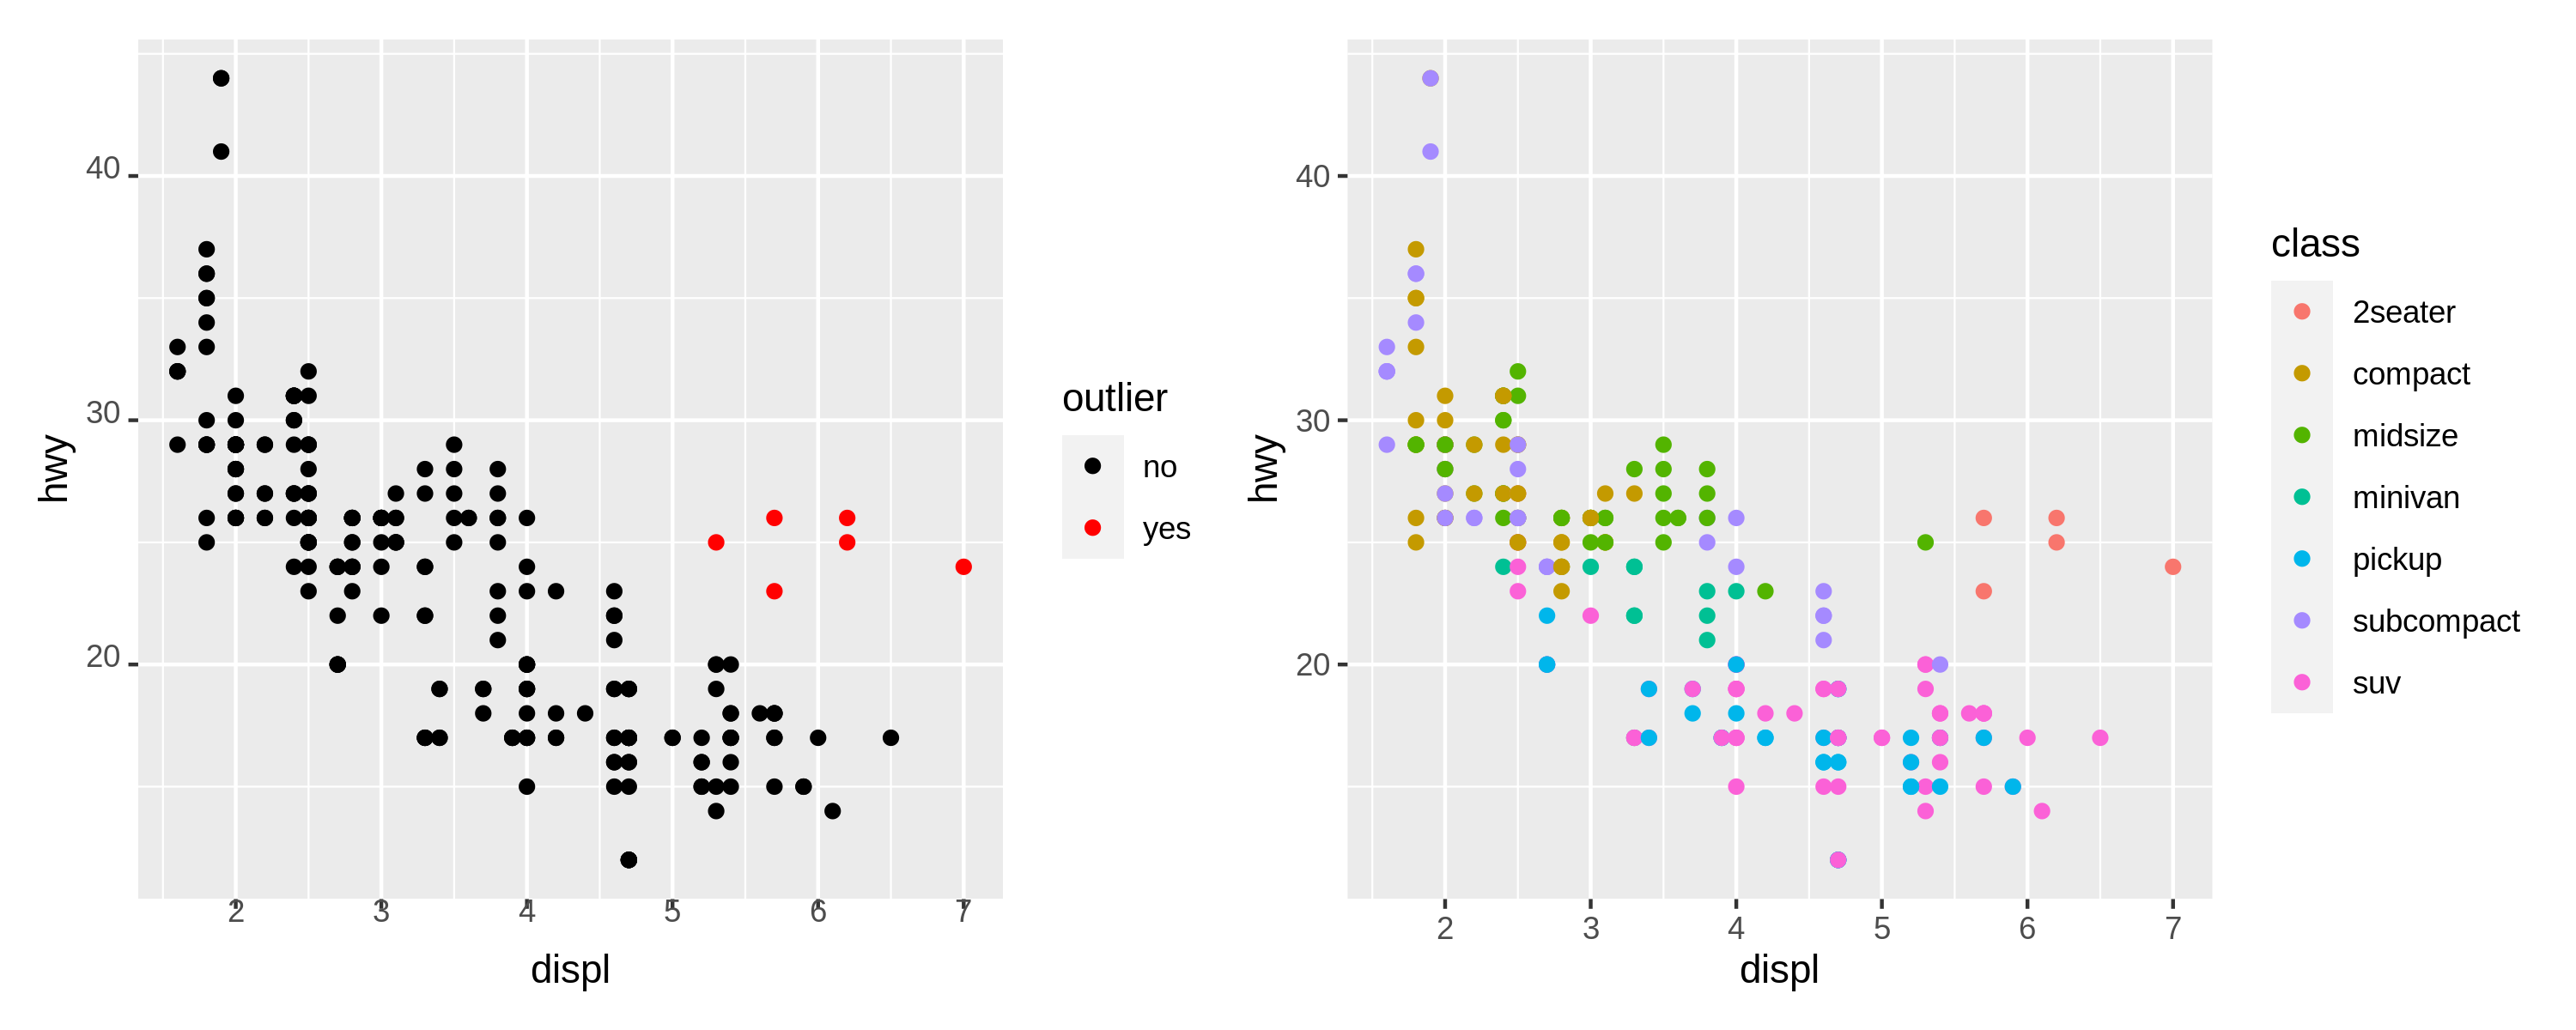

In [24]:
options(repr.plot.width=10, repr.plot.height=4)

p + p2